In [1]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt

### Check for the first graph

array([[0., 1., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0.]])

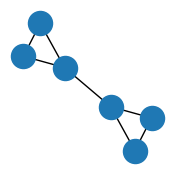

In [72]:
G = nx.Graph()
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(2, 2))

# Resolution
res = 1

# Add edges to the graph (also adds nodes)
G.add_edges_from([(0,1),(1,2),(0,2), (3,4),(4,5),(5,3), (5,0)])
nx.draw(G, ax=ax)
c1 = [0,1,2]
c2 = [3,4,5]
c = c1+c2
A_ij = nx.to_numpy_array(G, nodelist=c)
A_ij

#### Samplers

In [80]:
from samplers.regular.dqm_sampler import DQMSampler
from samplers.regular.louvain_sampler import LouvainSampler
from searchers.community_searcher import CommunitySearcher
from samplers.regular.bayan_sampler import BayanSampler
from samplers.regular.leiden import LeidenSampler


bayan = BayanSampler(G)
leiden = LeidenSampler(G)
dqm = DQMSampler(G, 5)
louvain = LouvainSampler(G, 1)

bayan_searcher = CommunitySearcher(bayan)
leiden_searcher = CommunitySearcher(leiden)
dqm_searcher = CommunitySearcher(dqm)
louvain_searcher = CommunitySearcher(louvain)

In [81]:
bayan_results = bayan_searcher.community_search(return_list=False);

In [82]:
bayan_results

{'x0': 0, 'x1': 0, 'x2': 0, 'x3': 1, 'x4': 1, 'x5': 1}

In [83]:
leiden_results = leiden_searcher.community_search(return_list=False)

In [84]:
leiden_results

{'x0': 0, 'x1': 0, 'x2': 0, 'x3': 1, 'x4': 1, 'x5': 1}

In [15]:
dqm_results = dqm_searcher.community_search()

In [16]:
dqm_results

[[0, 1, 2], [3, 4, 5]]

In [17]:
louvain_results = louvain_searcher.community_search()

In [19]:
louvain_results

[[0, 1, 2], [3, 4, 5]]

In [20]:
from samplers.hierarchical.advantage_sampler import AdvantageSampler
from searchers.hierarchical_community_searcher import HierarchicalCommunitySearcher

advantage = AdvantageSampler(G, 5)
searcher = HierarchicalCommunitySearcher(advantage)

In [21]:
advantage_results = searcher.hierarchical_community_search()

In [22]:
advantage_results

[[3, 4, 5], [0, 1, 2]]

In [22]:
from samplers.regular.louvain_sampler import LouvainSampler
import numpy as np

for resolution in np.linspace(0.1, 1, 10):
    louvain = LouvainSampler(G, resolution=resolution)
    louvain_searcher = CommunitySearcher(louvain)
    result = louvain_searcher.community_search(verbosity=0)
    print(f"resolution: {resolution:.2f}, result: {result}\n")

resolution: 0.10, result: [[0, 1, 2, 3, 4, 5]]

resolution: 0.20, result: [[0, 1, 2, 3, 4, 5]]

resolution: 0.30, result: [[0, 1, 2], [3, 4, 5]]

resolution: 0.40, result: [[0, 1, 2], [3, 4, 5]]

resolution: 0.50, result: [[0, 1, 2], [3, 4, 5]]

resolution: 0.60, result: [[0, 1, 2], [3, 4, 5]]

resolution: 0.70, result: [[0, 1, 2], [3, 4, 5]]

resolution: 0.80, result: [[0, 1, 2], [3, 4, 5]]

resolution: 0.90, result: [[0, 1, 2], [3, 4, 5]]

resolution: 1.00, result: [[0, 1, 2], [3, 4, 5]]



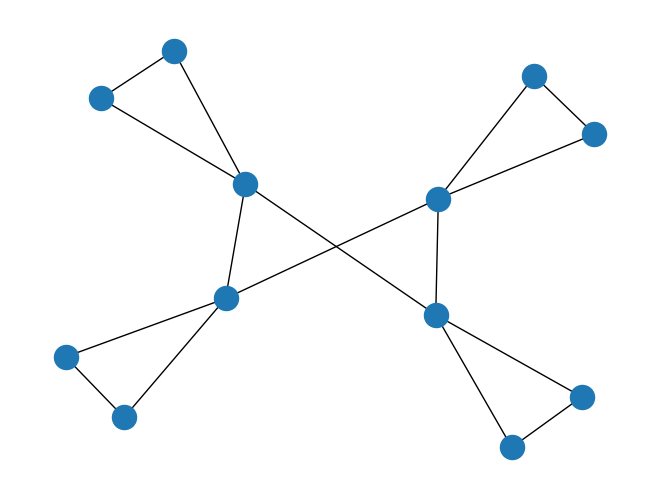

In [28]:
A_ij_bis = np.zeros((12,12))
A_ij_bis[:6,:6] = A_ij
A_ij_bis[6:12,6:12] = A_ij
A_ij_bis[6,5] = 1
A_ij_bis[0,-1] = 1

c1 = [0,1,2]
c2 = [3,4,5]
c3 = [6,7,8]
c4 = [9,10,11]
c = c1+c2+c3+c4
G_bis = nx.from_numpy_array(A_ij_bis)
nx.draw(G_bis)

In [35]:
bayan = BayanSampler(G_bis)
leiden = LeidenSampler(G_bis)
dqm = DQMSampler(G_bis, 5, communities=4)
louvain = LouvainSampler(G_bis, 1)

bayan_searcher = CommunitySearcher(bayan)
leiden_searcher = CommunitySearcher(leiden)
dqm_searcher = CommunitySearcher(dqm)
louvain_searcher = CommunitySearcher(louvain)

In [32]:
bayan_results = bayan_searcher.community_search();
bayan_results

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]

In [33]:
leiden_results = leiden_searcher.community_search()
leiden_results

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]

In [36]:
dqm_results = dqm_searcher.community_search()
dqm_results

[[9, 10, 11], [0, 1, 2], [3, 4, 5], [6, 7, 8]]

In [37]:
louvain_results = louvain_searcher.community_search()
louvain_results

[[0, 1, 2], [3, 4, 5], [8, 6, 7], [9, 10, 11]]

In [40]:
advantage = AdvantageSampler(G_bis, 5)
searcher = HierarchicalCommunitySearcher(advantage)

In [41]:
advantage_results = searcher.hierarchical_community_search()
advantage_results

[[0, 1, 2], [9, 10, 11], [3, 4, 5], [6, 7, 8]]

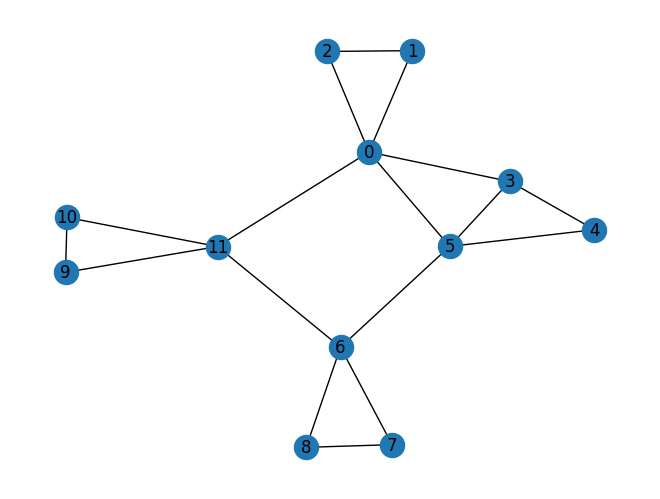

In [42]:
A_ij_bis_bis = np.zeros((12,12))
A_ij_bis_bis[:6,:6] = A_ij
A_ij_bis_bis[6:12,6:12] = A_ij
A_ij_bis_bis[6,5] = 1
A_ij_bis_bis[5,6] = 1
A_ij_bis_bis[0,-1] = 1
A_ij_bis_bis[-1,0] = 1

# Extra edge
A_ij_bis_bis[0,3] = 1
A_ij_bis_bis[3,0] = 1

c1 = [0,1,2]
c2 = [3,4,5]
c3 = [6,7,8]
c4 = [9,10,11]
c = c1+c2+c3+c4
G_bis_bis = nx.from_numpy_array(A_ij_bis_bis)
nx.draw(G_bis_bis, with_labels = True)

In [71]:
from samplers.regular.louvain_sampler import LouvainSampler
import numpy as np

for resolution in np.linspace(0.1, 1, 10):
    louvain = LouvainSampler(G_bis_bis, resolution=resolution)
    louvain_searcher = CommunitySearcher(louvain)
    result = louvain_searcher.community_search(verbosity=0)
    communities = nx.community.louvain_communities(G=G_bis_bis, resolution=resolution)
    print(f"resolution: {resolution:.2f}, result: {result}, communities: {communities}\n")
    modularity = nx.community.modularity(G_bis_bis, result)
    print(f"modularity: {modularity:.2f}\n")

resolution: 0.10, result: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]], communities: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}]

modularity: 0.00

resolution: 0.20, result: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]], communities: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}]

modularity: 0.00

resolution: 0.30, result: [[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11]], communities: [{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11}]

modularity: 0.38

resolution: 0.40, result: [[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11]], communities: [{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11}]

modularity: 0.38

resolution: 0.50, result: [[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11]], communities: [{0, 1, 2, 3, 4, 5}, {6, 7, 8, 9, 10, 11}]

modularity: 0.38

resolution: 0.60, result: [[0, 1, 2, 3, 4, 5], [8, 6, 7], [9, 10, 11]], communities: [{0, 1, 2, 3, 4, 5}, {8, 6, 7}, {9, 10, 11}]

modularity: 0.43

resolution: 0.70, result: [[0, 1, 2, 3, 4, 5], [8, 6, 7], [9, 10, 11]], communities: [{0, 1, 2, 3, 4, 5}, {8, 6, 7}, {9, 10, 11}]

mod

In [85]:
bayan = BayanSampler(G_bis_bis)
leiden = LeidenSampler(G_bis_bis)
dqm = DQMSampler(G_bis_bis, 5, communities=4)
louvain = LouvainSampler(G_bis_bis, 1)

bayan_searcher = CommunitySearcher(bayan)
leiden_searcher = CommunitySearcher(leiden)
dqm_searcher = CommunitySearcher(dqm)
louvain_searcher = CommunitySearcher(louvain)

In [86]:
bayan_results = bayan_searcher.community_search(return_list=False);
bayan_results

{'x0': 0,
 'x1': 0,
 'x2': 0,
 'x3': 1,
 'x4': 1,
 'x5': 1,
 'x6': 2,
 'x7': 2,
 'x8': 2,
 'x9': 3,
 'x10': 3,
 'x11': 3}

In [93]:
type(list(bayan_results.keys())[0])

str

In [87]:
leiden_results = leiden_searcher.community_search(return_list=False)
leiden_results

{'x0': 0,
 'x1': 0,
 'x2': 0,
 'x3': 1,
 'x4': 1,
 'x5': 1,
 'x6': 2,
 'x7': 2,
 'x8': 2,
 'x9': 3,
 'x10': 3,
 'x11': 3}

In [46]:
dqm_results = dqm_searcher.community_search()
dqm_results

[[6, 7, 8], [0, 1, 2], [9, 10, 11], [3, 4, 5]]

In [47]:
louvain_results = louvain_searcher.community_search()
louvain_results

[[0, 1, 2], [3, 4, 5], [8, 6, 7], [9, 10, 11]]

In [48]:
advantage = AdvantageSampler(G_bis_bis, 5)
searcher = HierarchicalCommunitySearcher(advantage)

In [49]:
advantage_results = searcher.hierarchical_community_search()
advantage_results

[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]